In [57]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS
import descartes
import geopandas as gdp
from shapely.geometry import Point, Polygon

df = pd.read_csv("time_series_covid_19_confirmed.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [58]:
world_map=gdp.read_file('ne_50m_admin_0_countries.shp')

In [59]:
gdf=gdp.GeoDataFrame(df,geometry=gdp.points_from_xy(df.Long,df.Lat))
print(gdf.head())

  Province/State  Country/Region       Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.82571  117.2264        1        9   
1        Beijing  Mainland China  40.18238  116.4142       14       22   
2      Chongqing  Mainland China  30.05718  107.8740        6        9   
3         Fujian  Mainland China  26.07783  117.9895        1        5   
4          Gansu  Mainland China  36.06110  103.8343        0        2   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/12/20  2/13/20  2/14/20  \
0       15       39       60       70  ...      889      910      934   
1       36       41       68       80  ...      352      366      372   
2       27       57       75      110  ...      518      529      537   
3       10       18       35       59  ...      272      279      281   
4        2        4        7       14  ...       87       90       90   

   2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  \
0      950      962      973      982      986      987  

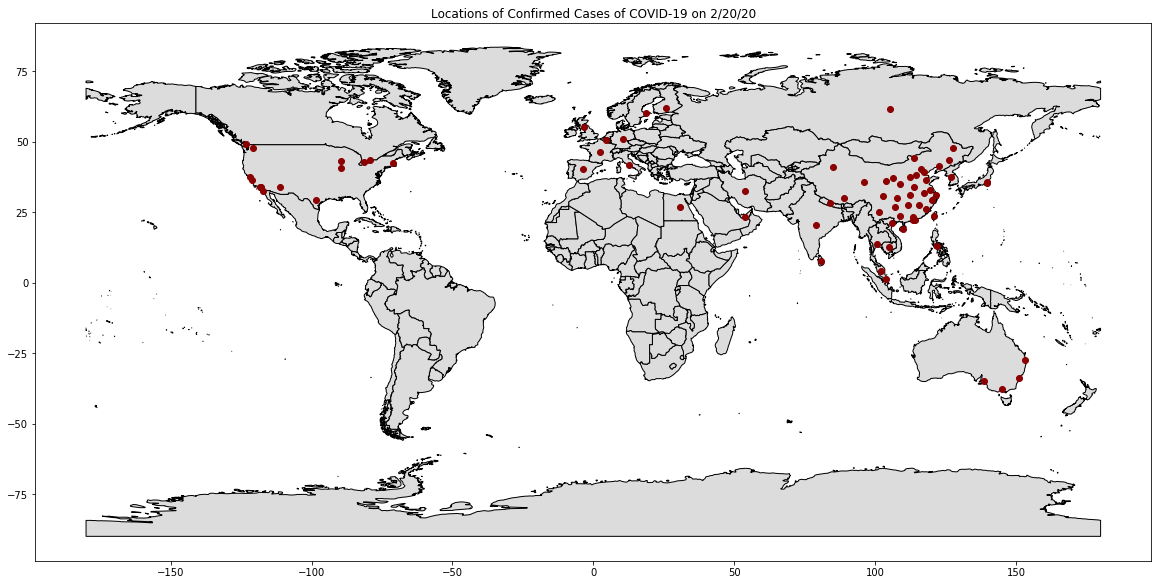

In [60]:
ax=world_map.plot(color='gainsboro',edgecolor='black',figsize=(20,20))
gdf.plot(ax=ax,color='darkred')
ax.set_title("Locations of Confirmed Cases of COVID-19 on 2/20/20")
plt.show()

In [61]:
# Drop uneeded variables 'Lat' and 'Long'
df.drop('Lat',axis=1,inplace=True)
df.drop('Long',axis=1,inplace=True)
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,geometry
0,Anhui,Mainland China,1,9,15,39,60,70,106,152,...,889,910,934,950,962,973,982,986,987,POINT (117.22640 31.82571)
1,Beijing,Mainland China,14,22,36,41,68,80,91,111,...,352,366,372,375,380,381,387,393,395,POINT (116.41420 40.18238)
2,Chongqing,Mainland China,6,9,27,57,75,110,132,147,...,518,529,537,544,551,553,555,560,567,POINT (107.87400 30.05718)
3,Fujian,Mainland China,1,5,10,18,35,59,80,84,...,272,279,281,285,287,290,292,293,293,POINT (117.98950 26.07783)
4,Gansu,Mainland China,0,2,2,4,7,14,19,24,...,87,90,90,90,90,91,91,91,91,POINT (103.83430 36.06110)


In [62]:
# Check for missing values
missing_values_count=df.isnull().sum()
missing_values_count[:]

Province/State    23
Country/Region     0
1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
1/27/20            0
1/28/20            0
1/29/20            0
1/30/20            0
1/31/20            0
2/1/20             0
2/2/20             0
2/3/20             0
2/4/20             0
2/5/20             0
2/6/20             0
2/7/20             0
2/8/20             0
2/9/20             0
2/10/20            0
2/11/20            0
2/12/20            0
2/13/20            0
2/14/20            0
2/15/20            0
2/16/20            0
2/17/20            0
2/18/20            0
2/19/20            0
2/20/20            0
geometry           0
dtype: int64

In [63]:
# 'Province/State' has 23 missing values, but we will keep this column as it could play an important role in
# understanding the origin of COVID-19.

In [64]:
# Fill missing values with "Unknown"
df['Province/State'].fillna("Unknown")

0                            Anhui
1                          Beijing
2                        Chongqing
3                           Fujian
4                            Gansu
                  ...             
71    Diamond Princess cruise ship
72            San Diego County, CA
73                 San Antonio, TX
74                         Unknown
75                         Unknown
Name: Province/State, Length: 76, dtype: object

In [65]:
# Number of confirmed cases on 2/20/20 by 'Country/Region'
total_cases_by_country=df.groupby('Country/Region')['2/20/20'].sum()
total_cases_by_country

Country/Region
Australia                  15
Belgium                     1
Cambodia                    1
Canada                      8
Egypt                       1
Finland                     1
France                     12
Germany                    16
Hong Kong                  68
India                       3
Iran                        5
Italy                       3
Japan                      94
Macau                      10
Mainland China          74999
Malaysia                   22
Nepal                       1
Others                    634
Philippines                 3
Russia                      2
Singapore                  84
South Korea               104
Spain                       2
Sri Lanka                   1
Sweden                      1
Taiwan                     24
Thailand                   35
UK                          9
US                         15
United Arab Emirates        9
Vietnam                    16
Name: 2/20/20, dtype: int64

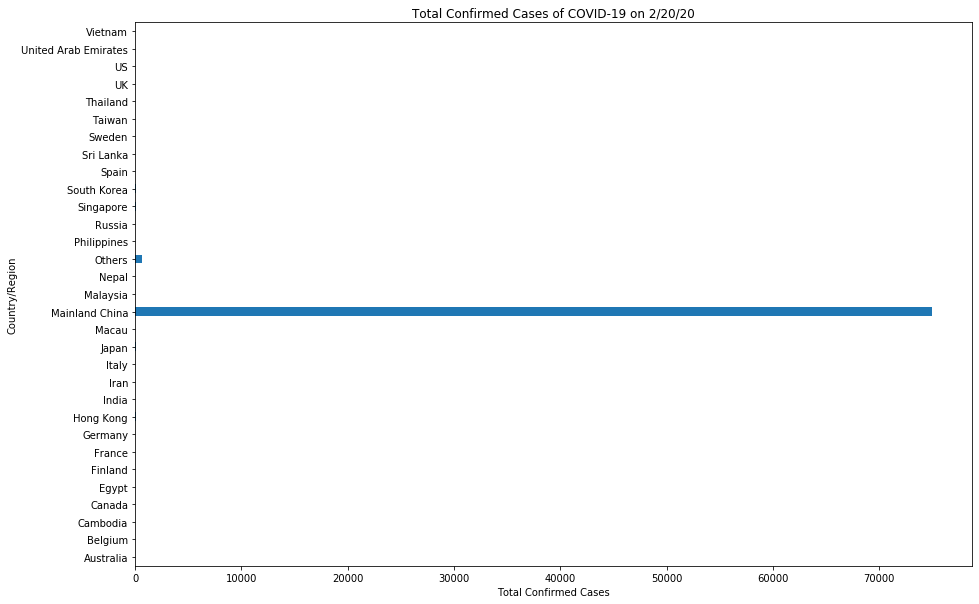

In [66]:
# Bar graph of total confirmed cases by 'Country/Region'
confirmed_by_country=total_cases_by_country.plot(kind='barh',stacked=True, title='Total Confirmed Cases of COVID-19 on 2/20/20',figsize=(15,10))
confirmed_by_country.set_ylabel('Country/Region')
confirmed_by_country.set_xlabel('Total Confirmed Cases')

plt.show()

In [67]:
# From the bar graph and word cloud, it is clear that the number of confirmed cases in Mainland China is
# significantly higher than any other country/region. COVID-19 must have begun in Mainland China and spread.
# 'Others' refers to the Diamond Princess Cruise Ship, where 634 cases have been confirmed after one passenger 
# tested positive for the virus. We will now focus on Mainland China to get more information.

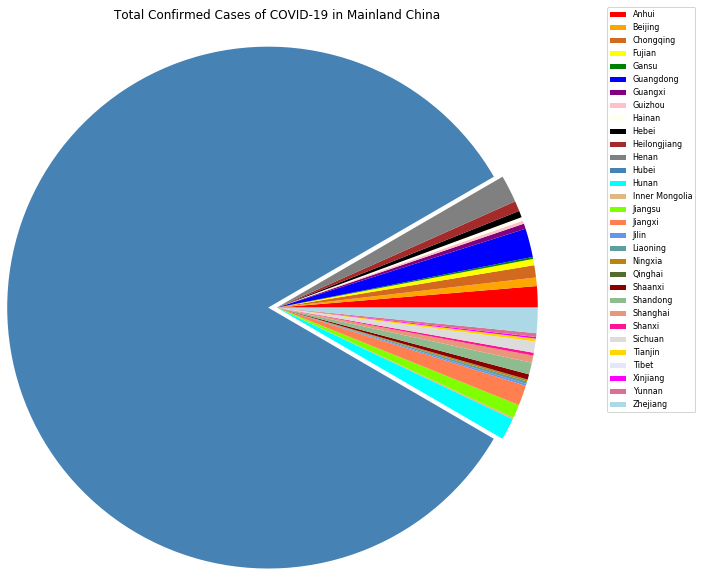

In [68]:
new_df=df.iloc[0:31]
labels=new_df['Province/State']
sliceColors = ['red','orange','chocolate','yellow','green','blue','purple','pink','ivory','black','brown','grey','steelblue','cyan','burlywood','chartreuse','coral','cornflowerblue','cadetblue','darkgoldenrod','darkolivegreen','darkred','darkseagreen','darksalmon','deeppink','gainsboro','gold','lavender','magenta','palevioletred','lightblue']
cs=cm.tab20c(np.arange(31)/31.)
explode=(0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(new_df['2/20/20'],radius=3.0,colors=sliceColors,explode=explode)
plt.legend(labels, loc='lower left', bbox_to_anchor=(2, 0),fontsize=8)
plt.title("Total Confirmed Cases of COVID-19 in Mainland China",pad=180)
plt.show()

In [69]:
# Hubei has the highest number of confirmed cases of COVID-19. This must be where the outbreak started and can
# now be further investigated by officials.

In [70]:
# Get the total confirmed cases in Mainland China for each day from 1/22/20 to 2/20/20
total_12220=new_df['1/22/20'].sum()
total_12320=new_df['1/23/20'].sum()
total_12420=new_df['1/24/20'].sum()
total_12520=new_df['1/25/20'].sum()
total_12620=new_df['1/26/20'].sum()
total_12720=new_df['1/27/20'].sum()
total_12820=new_df['1/28/20'].sum()
total_12920=new_df['1/29/20'].sum()
total_13020=new_df['1/30/20'].sum()
total_13120=new_df['1/31/20'].sum()
total_2120=new_df['2/1/20'].sum()
total_2220=new_df['2/2/20'].sum()
total_2320=new_df['2/3/20'].sum()
total_2420=new_df['2/4/20'].sum()
total_2520=new_df['2/5/20'].sum()
total_2620=new_df['2/6/20'].sum()
total_2720=new_df['2/7/20'].sum()
total_2820=new_df['2/8/20'].sum()
total_2920=new_df['2/9/20'].sum()
total_21020=new_df['2/10/20'].sum()
total_21120=new_df['2/11/20'].sum()
total_21220=new_df['2/12/20'].sum()
total_21320=new_df['2/13/20'].sum()
total_21420=new_df['2/14/20'].sum()
total_21520=new_df['2/15/20'].sum()
total_21620=new_df['2/16/20'].sum()
total_21720=new_df['2/17/20'].sum()
total_21820=new_df['2/18/20'].sum()
total_21920=new_df['2/19/20'].sum()
total_22020=new_df['2/20/20'].sum()

In [71]:
other_df=df.iloc[31:]
other_df

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,geometry
31,NaN,Thailand,2,3,5,7,8,8,14,14,...,33,33,33,33,34,35,35,35,35,POINT (100.50180 13.75630)
32,NaN,Japan,2,1,2,2,4,4,7,7,...,28,28,29,43,59,66,74,84,94,POINT (139.65030 35.67620)
33,NaN,South Korea,1,1,2,2,3,4,4,4,...,28,28,28,28,29,30,31,31,104,POINT (126.97800 37.56650)
34,Taiwan,Taiwan,1,1,3,3,4,5,8,8,...,18,18,18,18,20,22,22,23,24,POINT (120.96050 23.69780)
35,"Seattle, WA",US,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,POINT (-120.74000 47.75110)
36,"Chicago, IL",US,0,0,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,POINT (-89.39850 40.63310)
37,"Tempe, AZ",US,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,POINT (-111.09400 34.04890)
38,Macau,Macau,1,2,2,2,5,6,7,7,...,10,10,10,10,10,10,10,10,10,POINT (113.54390 22.19870)
39,Hong Kong,Hong Kong,0,2,2,5,8,8,8,10,...,50,53,56,56,57,60,62,63,68,POINT (114.16940 22.31930)
40,NaN,Singapore,0,1,3,3,4,5,7,7,...,50,58,67,72,75,77,81,84,84,POINT (103.81980 1.35210)


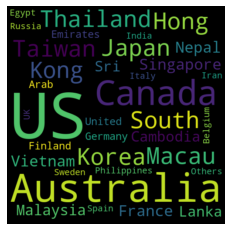

In [72]:
# See which countries/regions have the highest distribution of confirmed cases of COVID-19
words = ' '
for val in other_df['Country/Region']:
    val = str(val)
    tokens = val.split()
    for word in tokens:
        words = words + word + ' '
wordcloud = WordCloud(width=500,height=500,margin=10).generate(words)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

In [73]:
# Get total number of confirmed cases of COVID-19 from other parts of the world each day from 1/22/20 to 2/20/20
tot_12220=other_df['1/22/20'].sum()
tot_12320=other_df['1/23/20'].sum()
tot_12420=other_df['1/24/20'].sum()
tot_12520=other_df['1/25/20'].sum()
tot_12620=other_df['1/26/20'].sum()
tot_12720=other_df['1/27/20'].sum()
tot_12820=other_df['1/28/20'].sum()
tot_12920=other_df['1/29/20'].sum()
tot_13020=other_df['1/30/20'].sum()
tot_13120=other_df['1/31/20'].sum()
tot_2120=other_df['2/1/20'].sum()
tot_2220=other_df['2/2/20'].sum()
tot_2320=other_df['2/3/20'].sum()
tot_2420=other_df['2/4/20'].sum()
tot_2520=other_df['2/5/20'].sum()
tot_2620=other_df['2/6/20'].sum()
tot_2720=other_df['2/7/20'].sum()
tot_2820=other_df['2/8/20'].sum()
tot_2920=other_df['2/9/20'].sum()
tot_21020=other_df['2/10/20'].sum()
tot_21120=other_df['2/11/20'].sum()
tot_21220=other_df['2/12/20'].sum()
tot_21320=other_df['2/13/20'].sum()
tot_21420=other_df['2/14/20'].sum()
tot_21520=other_df['2/15/20'].sum()
tot_21620=other_df['2/16/20'].sum()
tot_21720=other_df['2/17/20'].sum()
tot_21820=other_df['2/18/20'].sum()
tot_21920=other_df['2/19/20'].sum()
tot_22020=other_df['2/20/20'].sum()

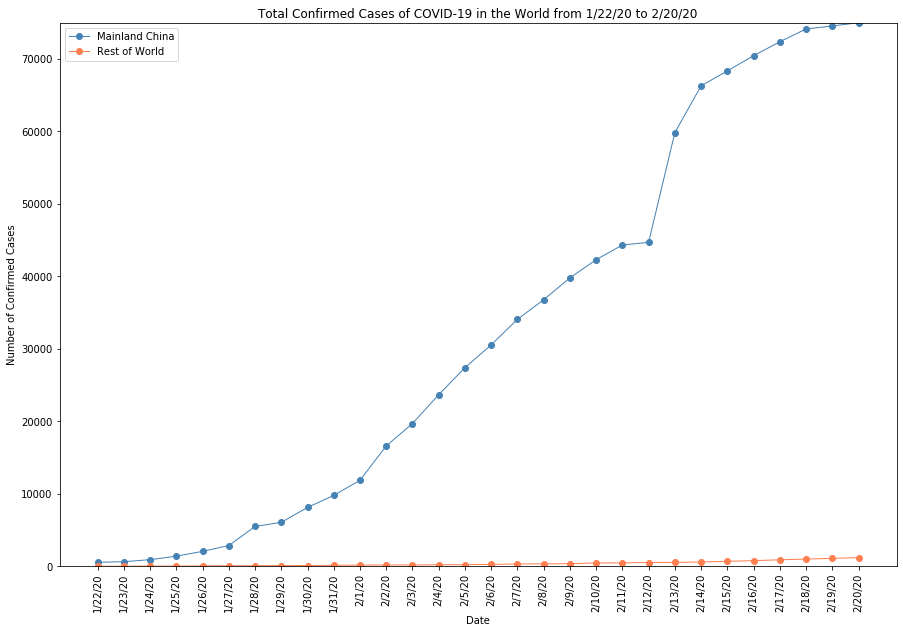

In [74]:
w = 4
h = 3
d = 70
plt.figure(figsize=(15,10))
x1 = ['1/22/20','1/23/20','1/24/20','1/25/20','1/26/20','1/27/20','1/28/20','1/29/20','1/30/20','1/31/20','2/1/20','2/2/20','2/3/20','2/4/20','2/5/20','2/6/20','2/7/20','2/8/20','2/9/20','2/10/20','2/11/20','2/12/20','2/13/20','2/14/20','2/15/20','2/16/20','2/17/20','2/18/20','2/19/20','2/20/20',]
y1 = [total_12220,total_12320,total_12420,total_12520,total_12620,total_12720,total_12820,total_12920,total_13020,total_13120,total_2120,total_2220,total_2320,total_2420,total_2520,total_2620,total_2720,total_2820,total_2920,total_21020,total_21120,total_21220,total_21320,total_21420,total_21520,total_21620,total_21720,total_21820,total_21920,total_22020]
x2 = ['1/22/20','1/23/20','1/24/20','1/25/20','1/26/20','1/27/20','1/28/20','1/29/20','1/30/20','1/31/20','2/1/20','2/2/20','2/3/20','2/4/20','2/5/20','2/6/20','2/7/20','2/8/20','2/9/20','2/10/20','2/11/20','2/12/20','2/13/20','2/14/20','2/15/20','2/16/20','2/17/20','2/18/20','2/19/20','2/20/20',]
y2 = [tot_12220,tot_12320,tot_12420,tot_12520,tot_12620,tot_12720,tot_12820,tot_12920,tot_13020,tot_13120,tot_2120,tot_2220,tot_2320,tot_2420,tot_2520,tot_2620,tot_2720,tot_2820,tot_2920,tot_21020,tot_21120,tot_21220,tot_21320,tot_21420,tot_21520,tot_21620,tot_21720,tot_21820,tot_21920,tot_22020]
plt.xticks(rotation=90)
plt.title("Total Confirmed Cases of COVID-19 in the World from 1/22/20 to 2/20/20")
plt.ylim(0, total_22020)
plt.xlabel("Date")
plt.ylabel("Number of Confirmed Cases")
mainland_china=plt.plot(x1,y1, marker='o', color='steelblue', linewidth=1,label="Mainland China")
rest_of_world=plt.plot(x2,y2, marker='o', color='coral', linewidth=1,label="Rest of World")
plt.legend(loc="upper left")
